# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
count = 1
cities_final = []
temp = []
humidity = []
cloud = []
wind = []
lat = []
lng = []
country = []
time = []

for city in cities:
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    
    try:
        temp.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        cloud.append(weather_json['clouds']['all'])
        wind.append(weather_json['wind']['speed'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        cities_final.append(weather_json['name'])
        country.append(weather_json['sys']['country'])
        time.append(weather_json['dt'])
        print(f'City number {count} of {len(cities)} | {city}')
    except:
        print(f'{city} not found')
        
        
    
    count += 1

City number 1 of 608 | atuona
City number 2 of 608 | rikitea
mys shmidta not found
City number 4 of 608 | hermanus
City number 5 of 608 | haines junction
City number 6 of 608 | aksarka
City number 7 of 608 | sulangan
solovetskiy not found
City number 9 of 608 | puerto ayora
City number 10 of 608 | puri
City number 11 of 608 | tasiilaq
City number 12 of 608 | kindu
City number 13 of 608 | chokurdakh
tabiauea not found
City number 15 of 608 | saint-georges
westpunt not found
City number 17 of 608 | mataura
City number 18 of 608 | upata
City number 19 of 608 | jamestown
City number 20 of 608 | saint-philippe
City number 21 of 608 | busselton
City number 22 of 608 | pandan
illoqqortoormiut not found
City number 24 of 608 | evensk
City number 25 of 608 | cidreira
City number 26 of 608 | port alfred
City number 27 of 608 | vaini
City number 28 of 608 | cape town
City number 29 of 608 | jerusalem
City number 30 of 608 | port lincoln
attawapiskat not found
City number 32 of 608 | hovd
City num

City number 251 of 608 | beyla
City number 252 of 608 | wanganui
City number 253 of 608 | maniitsoq
City number 254 of 608 | alofi
City number 255 of 608 | pitimbu
cam pha not found
City number 257 of 608 | broome
City number 258 of 608 | wachtersbach
City number 259 of 608 | broken hill
City number 260 of 608 | hobyo
City number 261 of 608 | mosquera
City number 262 of 608 | halifax
City number 263 of 608 | bethel
City number 264 of 608 | cradock
City number 265 of 608 | palmer
City number 266 of 608 | den helder
City number 267 of 608 | lingao
City number 268 of 608 | tezu
City number 269 of 608 | mvuma
City number 270 of 608 | carupano
City number 271 of 608 | bundaberg
City number 272 of 608 | zaozerne
City number 273 of 608 | aklavik
City number 274 of 608 | agbor
City number 275 of 608 | lisala
City number 276 of 608 | mandalgovi
City number 277 of 608 | chhatak
City number 278 of 608 | santa maria
City number 279 of 608 | darlawn
City number 280 of 608 | knysna
City number 281 o

City number 498 of 608 | coihaique
City number 499 of 608 | erzin
City number 500 of 608 | lianran
City number 501 of 608 | olafsvik
City number 502 of 608 | karakulino
City number 503 of 608 | okha
sorvag not found
City number 505 of 608 | kahului
plackovci not found
City number 507 of 608 | lisbon
City number 508 of 608 | anshun
City number 509 of 608 | birobidzhan
City number 510 of 608 | ambon
City number 511 of 608 | atherton
City number 512 of 608 | muli
City number 513 of 608 | yeniseysk
City number 514 of 608 | quang ngai
City number 515 of 608 | socastee
City number 516 of 608 | georgiyevskoye
City number 517 of 608 | sinnamary
City number 518 of 608 | san andres
City number 519 of 608 | ribas do rio pardo
City number 520 of 608 | batagay
City number 521 of 608 | wuwei
City number 522 of 608 | souris
City number 523 of 608 | prado
City number 524 of 608 | uvinza
City number 525 of 608 | matara
City number 526 of 608 | port macquarie
City number 527 of 608 | lardos
City number 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    'City' : cities_final,
    'Lat' : lat,
    'Lng' : lng,
    'Temperature' : temp,
    'Humidity' : humidity,
    'Cloudiness' : cloud,
    'Wind Speed' : wind,
    'Country' : country,
    'Date' : time
}
weather_data = pd.DataFrame(weather_dict)
weather_data['Temperature'] = weather_data['Temperature'].astype('float') * 1.8 -459.67
weather_data['Wind Speed'] = weather_data['Wind Speed'].astype('float') * 2.23693629
weather_data.head()

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,78.998,76,36,14.383500,PF,1651341059
1,Rikitea,-23.1203,-134.9692,75.848,76,58,14.316392,PF,1651341245
2,Hermanus,-34.4187,19.2345,52.808,86,38,4.205440,ZA,1651341256
3,Haines Junction,60.7522,-137.5108,40.946,56,79,1.140838,CA,1651341256
4,Aksarka,66.5606,67.7975,16.520,91,95,7.381890,RU,1651341257


In [5]:
weather_data.describe()

,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,20.334943,13.883464,61.773883,68.872340,59.340426,8.236368,1.651341e+09
std,33.233427,91.282689,20.248602,21.304392,38.068804,5.221312,1.091264e+02
min,-54.800000,-175.200000,-4.900000,6.000000,0.000000,0.000000,1.651341e+09
25%,-6.511200,-66.513575,49.563500,56.000000,20.000000,4.317287,1.651341e+09
50%,24.861350,16.673000,63.896000,74.000000,73.000000,7.046349,1.651341e+09
75%,48.174550,93.787425,78.129500,85.000000,99.000000,11.369229,1.651341e+09
max,78.218600,179.316700,103.298000,100.000000,100.000000,34.672512,1.651342e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_data = weather_data.loc[weather_data['Humidity'] <= 100]
weather_data.describe()

,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,20.334943,13.883464,61.773883,68.872340,59.340426,8.236368,1.651341e+09
std,33.233427,91.282689,20.248602,21.304392,38.068804,5.221312,1.091264e+02
min,-54.800000,-175.200000,-4.900000,6.000000,0.000000,0.000000,1.651341e+09
25%,-6.511200,-66.513575,49.563500,56.000000,20.000000,4.317287,1.651341e+09
50%,24.861350,16.673000,63.896000,74.000000,73.000000,7.046349,1.651341e+09
75%,48.174550,93.787425,78.129500,85.000000,99.000000,11.369229,1.651341e+09
max,78.218600,179.316700,103.298000,100.000000,100.000000,34.672512,1.651342e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
over_100 = weather_data.loc[weather_data['Humidity'] > 100]
print(over_100.index)

Int64Index([], dtype='int64')


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

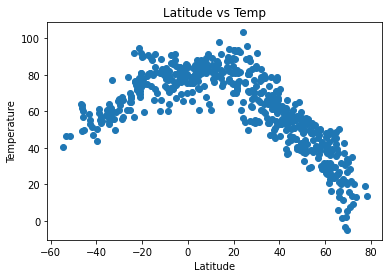

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Temperature"])
plt.title('Latitude vs Temp')
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig('../output_data/Lat_v_Temp')
plt.show()



## Latitude vs. Humidity Plot

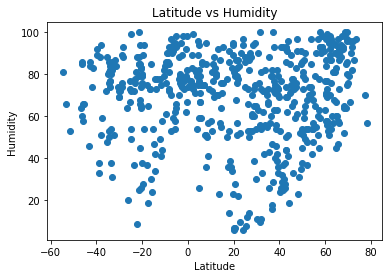

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"])
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('../output_data/Lat_v_Humid')
plt.show()

## Latitude vs. Cloudiness Plot

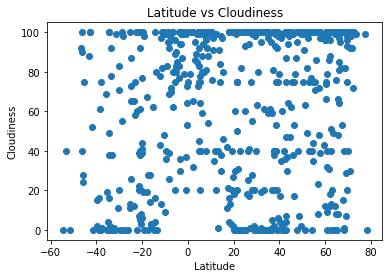

In [11]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"])
plt.title('Latitude vs Cloudiness')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('../output_data/Lat_v_Cloud')
plt.show()

## Latitude vs. Wind Speed Plot

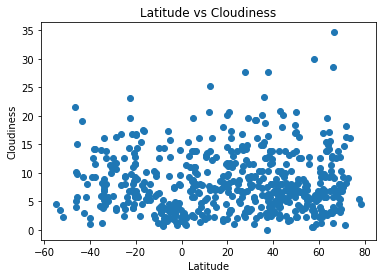

In [12]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"])
plt.title('Latitude vs Cloudiness')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('../output_data/Lat_v_Wind')
plt.show()

## Linear Regression

In [13]:
Northern_Hemisphere_df = weather_data.loc[weather_data['Lat'] > 0]
Southern_Hemisphere_df = weather_data.loc[weather_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

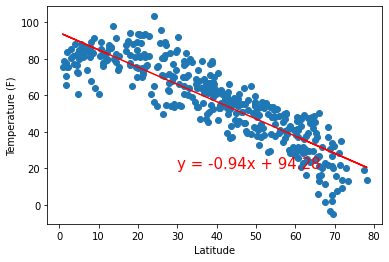

r = -0.8768731599346795


In [16]:
x_values = Northern_Hemisphere_df['Lat']
y_values = Northern_Hemisphere_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('../output_data/Lat_v_Temp_North')
plt.show()
print(f'r = {rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

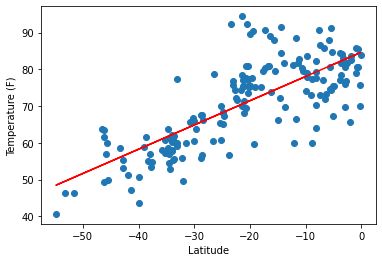

r = 0.7581271776121985


In [17]:
x_values = Southern_Hemisphere_df['Lat']
y_values = Southern_Hemisphere_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('../output_data/Lat_v_Temp_South')
plt.show()
print(f'r = {rvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

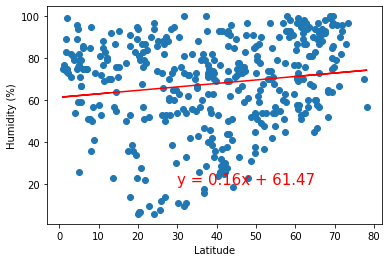

r = 0.15065554578202625


In [18]:
x_values = Northern_Hemisphere_df['Lat']
y_values = Northern_Hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('../output_data/Lat_v_Humidity_North')
plt.show()
print(f'r = {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

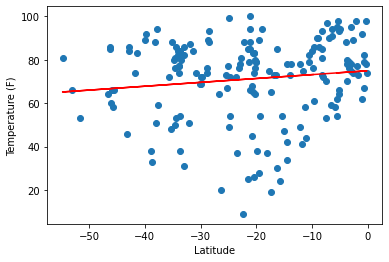

r = 0.1274828797354606


In [19]:
x_values = Southern_Hemisphere_df['Lat']
y_values = Southern_Hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('../output_data/Lat_v_Humidity_South')
plt.show()
print(f'r = {rvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

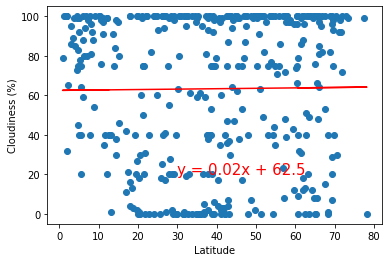

r = 0.011288741576024846


In [20]:
x_values = Northern_Hemisphere_df['Lat']
y_values = Northern_Hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('../output_data/Lat_v_Cloud_North')
plt.show()
print(f'r = {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

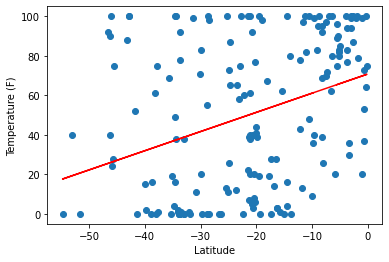

r = 0.3480440015360558


In [21]:
x_values = Southern_Hemisphere_df['Lat']
y_values = Southern_Hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('../output_data/Lat_v_Cloud_South')
plt.show()
print(f'r = {rvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

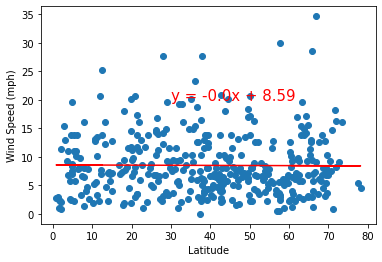

r = -0.00780463156806798


In [22]:
x_values = Northern_Hemisphere_df['Lat']
y_values = Northern_Hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('../output_data/Lat_v_Wind_North')
plt.show()
print(f'r = {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

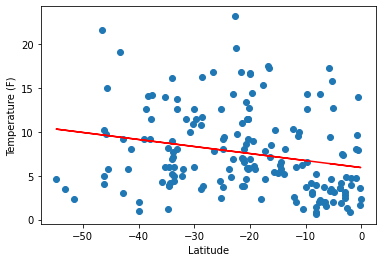

r = -0.22701214831359864


In [23]:
x_values = Southern_Hemisphere_df['Lat']
y_values = Southern_Hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('../output_data/Lat_v_Wind_South')
plt.show()
print(f'r = {rvalue}')

In [ ]:
'''
We find, based on the data, that there is little to no correlation between wind speed and latitude as well as cloudiness and latitude in the northern hemisphere.
We find, based on the data, to be a moderate-strong correlation between temperature and latitude in both the northern and southern hemispheres.
We find, based on the data, to be a weak correlation between wind speed and latitude in the southern hemisphere.
'''